# TASK-4

In [24]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
# Load the Dataset
df = pd.read_csv("ratings.csv", index_col=0)
df

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11
User1,4.0,5.0,3.0,5.0,NaN,2.0,NaN,NaN,3.0,5.0,4.0
User2,NaN,5.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,5.0
User3,4.0,1.0,1.0,3.0,NaN,2.0,4.0,4.0,3.0,4.0,4.0
User4,NaN,3.0,5.0,3.0,5.0,1.0,2.0,4.0,1.0,4.0,NaN
User5,2.0,NaN,2.0,5.0,NaN,4.0,NaN,NaN,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
User176,NaN,5.0,3.0,NaN,5.0,4.0,5.0,4.0,3.0,5.0,4.0
User177,3.0,NaN,NaN,NaN,2.0,1.0,5.0,4.0,2.0,NaN,3.0
User178,4.0,2.0,5.0,1.0,2.0,5.0,2.0,4.0,NaN,4.0,NaN
User179,4.0,NaN,2.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0


In [26]:
#get top 5 values
df.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11
User1,4.0,5.0,3.0,5.0,NaN,2.0,NaN,NaN,3.0,5.0,4.0
User2,NaN,5.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,5.0
User3,4.0,1.0,1.0,3.0,NaN,2.0,4.0,4.0,3.0,4.0,4.0
User4,NaN,3.0,5.0,3.0,5.0,1.0,2.0,4.0,1.0,4.0,NaN
User5,2.0,NaN,2.0,5.0,NaN,4.0,NaN,NaN,4.0,5.0,3.0


In [27]:
#count missing values
df.isnull().sum()

Movie1     55
Movie2     50
Movie3     53
Movie4     46
Movie5     61
Movie6     60
Movie7     54
Movie8     54
Movie9     46
Movie10    40
Movie11    54
dtype: int64

In [28]:
#print shape of the dataset
df.shape

(180, 11)

In [29]:
#printing columns of the columns
list(df.columns)

['Movie1',
 'Movie2',
 'Movie3',
 'Movie4',
 'Movie5',
 'Movie6',
 'Movie7',
 'Movie8',
 'Movie9',
 'Movie10',
 'Movie11']

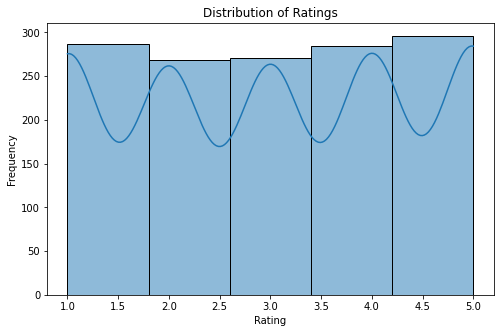

In [30]:
# Rating Distribution
ratings_series = df.values.flatten()
ratings_series = pd.Series(ratings_series).dropna()

plt.figure(figsize=(8, 5))
sns.histplot(ratings_series, bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [31]:
# Filling Missing Values with mean
df1= df.copy()
for col in df1.columns:
    df1[col].fillna(df1[col].mean(), inplace=True)


In [32]:
df1.isnull().sum()

Movie1     0
Movie2     0
Movie3     0
Movie4     0
Movie5     0
Movie6     0
Movie7     0
Movie8     0
Movie9     0
Movie10    0
Movie11    0
dtype: int64

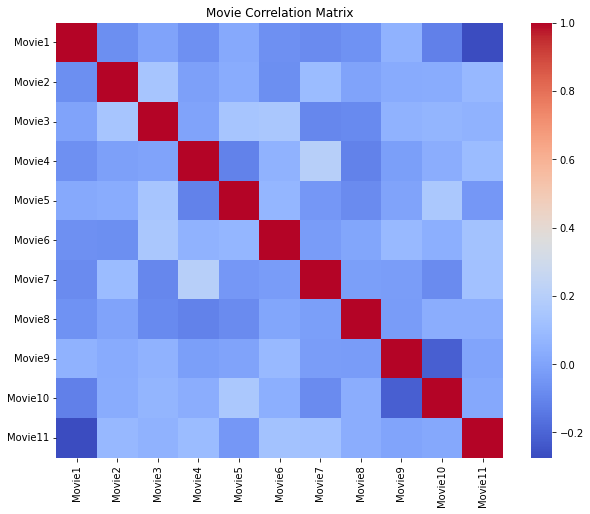

In [33]:
# Show Movie Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_filled.corr(), cmap="coolwarm")
plt.title("Movie Correlation Matrix")
plt.show()


In [34]:
#Matrix Factorization using Truncated SVD
svd = TruncatedSVD(n_components=5, random_state=42)
latent_matrix = svd.fit_transform(ratings_filled)

predicted_matrix = np.dot(latent_matrix, svd.components_)
predicted_df = pd.DataFrame(predicted_matrix, index=df.index, columns=df.columns)

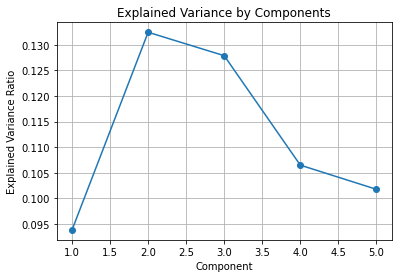

In [35]:
#Scree Plot (Explained Variance)
#A scree plot is a line graph used to show how much variance (information) is captured
explained = svd.explained_variance_ratio_
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Explained Variance by Components")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


In [36]:
#Evaluate with RMSE and MAE

actual = df.values.flatten()
predicted = predicted_df.values.flatten()

valid_mask = ~np.isnan(actual)

actual_valid = actual[valid_mask]
predicted_valid = predicted[valid_mask]

rmse = np.sqrt(mean_squared_error(actual_valid, predicted_valid))
mae = mean_absolute_error(actual_valid, predicted_valid)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Root Mean Squared Error: 0.8802
Mean Absolute Error: 0.7117


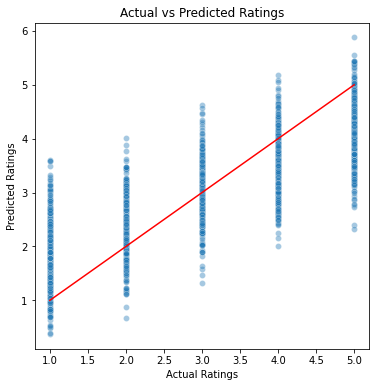

In [37]:
#Plot Actual vs Predicted Ratings

plt.figure(figsize=(6, 6))
sns.scatterplot(x=actual_valid, y=predicted_valid, alpha=0.4)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([1, 5], [1, 5], color='red')
plt.show()


In [38]:
#Build Recommendation Function
def recommend_movies(user, original_df, predicted_df, top_n=5):
    user_ratings = original_df.loc[user]
    predicted_ratings = predicted_df.loc[user]
    unrated_movies = user_ratings[user_ratings.isna()].index
    recommendations = predicted_ratings[unrated_movies].sort_values(ascending=False).head(top_n)
    return recommendations

# Example usage:
recommend_movies('User10', df, predicted_df, top_n=5)


Movie11    3.586493
Name: User10, dtype: float64